`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


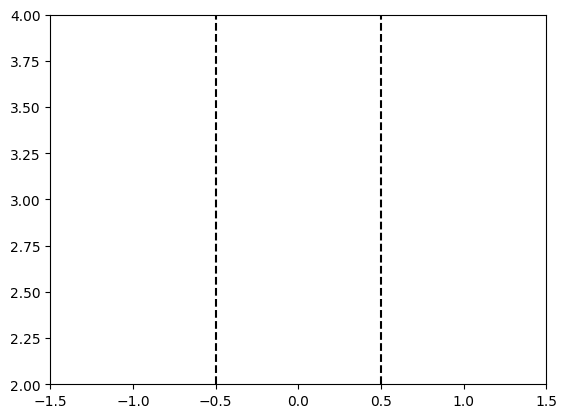

In [1]:
from intersection_sim import Simulator
from pedestrian_agent import Agent

import numpy as np

In [2]:
ev_noise_std=[0.001,0.01]
ev=Agent(role='EV', cl=3, noise_std=ev_noise_std)
tv_noise_std=[0.01, 0.1]
agents=[Agent(role='TV', cl=2, state=np.array([0, 7.]), noise_std=tv_noise_std) for i in range(1)]
agents.append(Agent(role='ped', cl=5, state=np.array([0., 4.]), noise_std=tv_noise_std, s_dec = 20))
agents.append(Agent(role='ped', cl=9, state=np.array([0., 2.]), noise_std=tv_noise_std, s_dec = 10))

tv_n_stds=[v.noise_std for v in agents]
agents.append(ev)
Sim=Simulator(agents)

# smpc=SMPC_MMPreds(Sim.routes, ev, EV_NOISE_STD=ev_noise_std, TV_NOISE_STD=tv_n_stds)

Sim.set_MPC_N(10)


while Sim.t<250 and not Sim.done():
    # print("Time: ",Sim.t)
    # smpc.update(Sim.get_update_dict())
    # sol=smpc.solve()
    # Sim.step(sol["u_control"])
    Sim.step()

EV reached 107.48389197575337


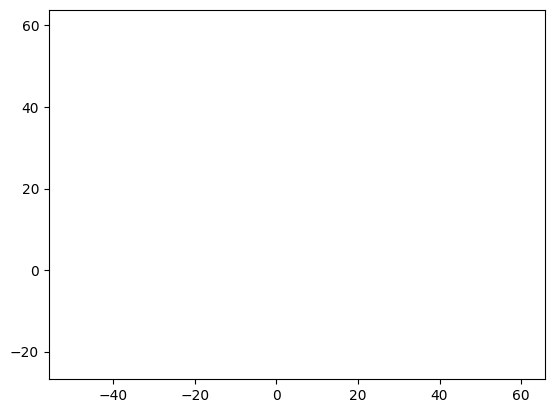

In [3]:
import matplotlib.pyplot as plt
import matplotlib.transforms as tf
from celluloid import Camera
from IPython.display import HTML
import pdb

fig, ax= plt.subplots()
camera = Camera(fig)

for  i in range(Sim.t):
    Sim.draw_intersection(ax, i)
    camera.snap()

animation = camera.animate(repeat = True, repeat_delay = 100)
HTML(animation.to_html5_video())